In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

Manually generate data


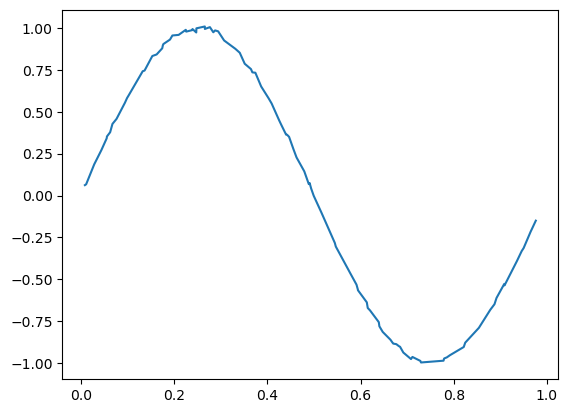

In [8]:
def f(x):
    return np.sin(2*np.pi*x)
#Define Feature
Feature = np.random.rand(100)
Feature=np.sort(Feature)
#Define Label 
Label=f(Feature)+np.random.normal(scale=0.01, size=Feature.shape)
plt.plot(Feature,Label)

Define hyperparameter (Cr:Pattern recognition and machine learning, chapter 3)

In [9]:
# alpha: precision of the prior distribution w
alpha=0.5
#beta: precision of the noise
beta=2

#basis function, citation from Pattern recognition and machine learning, equation 3.4
def phi_k(mu_k,x):
    s=0.5
    return np.exp(-np.square(x-mu_k)/(2*(s**2)))



Define function of design matrix (Cr:Pattern recognition and machine learning, chapter 3)

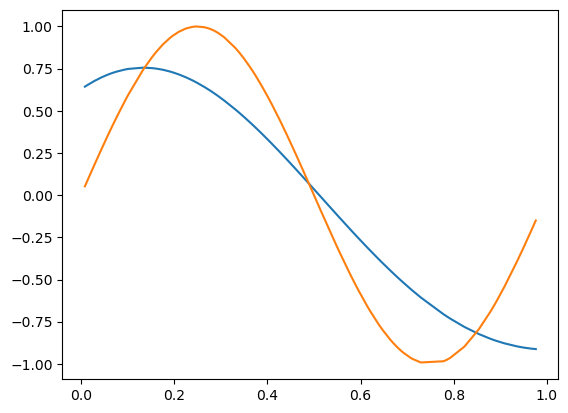

In [18]:
def Design_matrix(x):
    return np.column_stack([phi_k(k,x)for k in np.linspace(-1,1,9)])
#SN: standard deviation of predection
SN=inv(beta*np.matmul(Design_matrix(Feature).transpose(),Design_matrix(Feature))+alpha*np.identity(Design_matrix(Feature).shape[1]))
#MN: mean of prediction
MN=beta*np.matmul(np.matmul(SN,Design_matrix(Feature).transpose()),Label)



Generate prediction and plot

In [ ]:
#Prediction based on SN and MN
Prediction=Design_matrix(Feature)@MN
plt.plot(Feature, Prediction)
plt.plot(Feature, f(Feature))